In [1]:
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
import plotly.express as px


In [2]:
pd.set_option("display.max_columns", None)
hr = pd.read_excel("/content/HR-Data.xlsx")
hr.head()

,Attrition,Business Travel,CF_age band,CF_attrition label,Department,Education Field,emp no,Employee Number,Gender,Job Role,Marital Status,Over Time,Over18,Training Times Last Year,-2,0,Age,CF_attrition count,CF_attrition counts,CF_attrition rate,CF_current Employee,Daily Rate,Distance From Home,Education,Employee Count,Environment Satisfaction,Hourly Rate,Job Involvement,Job Level,Job Satisfaction,Monthly Income,Monthly Rate,Num Companies Worked,Percent Salary Hike,Performance Rating,Relationship Satisfaction,Standard Hours,Stock Option Level,Total Working Years,Work Life Balance,Years At Company,Years In Current Role,Years Since Last Promotion,Years With Curr Manager
0,Yes,Travel_Rarely,35 - 44,Ex-Employees,Sales,Life Sciences,STAFF-1,1,Female,Sales Executive,Single,Yes,Y,0,-2,0,41,1,1.0,1,0,1102,1,Associates Degree,1,2,94,3,2,4,5993,19479,8,11,3,1,80,0,8,1,6,4,0,5
1,No,Travel_Frequently,45 - 54,Current Employees,R&D,Life Sciences,STAFF-2,2,Male,Research Scientist,Married,No,Y,3,-2,0,49,0,NaN,0,1,279,8,High School,1,3,61,2,2,2,5130,24907,1,23,4,4,80,1,10,3,10,7,1,7
2,Yes,Travel_Rarely,35 - 44,Ex-Employees,R&D,Other,STAFF-4,4,Male,Laboratory Technician,Single,Yes,Y,3,-2,0,37,1,1.0,1,0,1373,2,Associates Degree,1,4,92,2,1,3,2090,2396,6,15,3,2,80,0,7,3,0,0,0,0
3,No,Travel_Frequently,25 - 34,Current Employees,R&D,Life Sciences,STAFF-5,5,Female,Research Scientist,Married,Yes,Y,3,-2,0,33,0,NaN,0,1,1392,3,Master's Degree,1,4,56,3,1,3,2909,23159,1,11,3,3,80,0,8,3,8,7,3,0
4,No,Travel_Rarely,25 - 34,Current Employees,R&D,Medical,STAFF-7,7,Male,Laboratory Technician,Married,No,Y,3,-2,0,27,0,NaN,0,1,591,2,High School,1,1,40,3,1,2,3468,16632,9,12,3,4,80,1,6,3,2,2,2,2


In [3]:
hr.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1470 entries, 0 to 1469
Data columns (total 44 columns):
 #   Column                      Non-Null Count  Dtype  
---  ------                      --------------  -----  
 0   Attrition                   1470 non-null   object 
 1   Business Travel             1470 non-null   object 
 2   CF_age band                 1470 non-null   object 
 3   CF_attrition label          1470 non-null   object 
 4   Department                  1470 non-null   object 
 5   Education Field             1470 non-null   object 
 6   emp no                      1470 non-null   object 
 7   Employee Number             1470 non-null   int64  
 8   Gender                      1470 non-null   object 
 9   Job Role                    1470 non-null   object 
 10  Marital Status              1470 non-null   object 
 11  Over Time                   1470 non-null   object 
 12  Over18                      1470 non-null   object 
 13  Training Times Last Year    1470 

In [4]:
hr.drop(columns=['-2'],inplace=True)
hr.drop(columns=['0'],inplace=True)

In [5]:
hr["CF_attrition counts"].unique()

array([ 1., nan])

In [6]:
hr.drop(columns=["CF_attrition counts"],inplace=True)

In [7]:
table = pd.DataFrame({
    'Unique':hr.nunique(),
    'Null':hr.isna().sum(),
    'NullPercent':hr.isna().sum() / len(hr),
    'Type':hr.dtypes.values
})
print(table)

                            Unique  Null  NullPercent    Type
Attrition                        2     0          0.0  object
Business Travel                  3     0          0.0  object
CF_age band                      5     0          0.0  object
CF_attrition label               2     0          0.0  object
Department                       3     0          0.0  object
Education Field                  6     0          0.0  object
emp no                        1470     0          0.0  object
Employee Number               1470     0          0.0   int64
Gender                           2     0          0.0  object
Job Role                         9     0          0.0  object
Marital Status                   3     0          0.0  object
Over Time                        2     0          0.0  object
Over18                           1     0          0.0  object
Training Times Last Year         7     0          0.0   int64
Age                             43     0          0.0   int64
CF_attri

In [8]:
hr.isnull().sum()

,0
Attrition,0
Business Travel,0
CF_age band,0
CF_attrition label,0
Department,0
Education Field,0
emp no,0
Employee Number,0
Gender,0
Job Role,0


In [9]:
hr.describe()

,Employee Number,Training Times Last Year,Age,CF_attrition count,CF_attrition rate,CF_current Employee,Daily Rate,Distance From Home,Employee Count,Environment Satisfaction,Hourly Rate,Job Involvement,Job Level,Job Satisfaction,Monthly Income,Monthly Rate,Num Companies Worked,Percent Salary Hike,Performance Rating,Relationship Satisfaction,Standard Hours,Stock Option Level,Total Working Years,Work Life Balance,Years At Company,Years In Current Role,Years Since Last Promotion,Years With Curr Manager
count,1470.000000,1470.000000,1470.000000,1470.000000,1470.000000,1470.000000,1470.000000,1470.000000,1470.0,1470.000000,1470.000000,1470.000000,1470.000000,1470.000000,1470.000000,1470.000000,1470.000000,1470.000000,1470.000000,1470.000000,1470.0,1470.000000,1470.000000,1470.000000,1470.000000,1470.000000,1470.000000,1470.000000
mean,1024.865306,2.799320,36.923810,0.161224,0.161224,0.838776,802.485714,9.192517,1.0,2.810204,65.891156,2.729932,2.063946,2.626531,6502.931293,14313.103401,2.693197,15.209524,3.153741,2.712245,80.0,0.793878,11.279592,2.761224,7.008163,4.229252,2.187755,4.123129
std,602.024335,1.289271,9.135373,0.367863,0.367863,0.367863,403.509100,8.106864,0.0,1.103879,20.329428,0.711561,1.106940,1.067486,4707.956783,7117.786044,2.498009,3.659938,0.360824,1.081209,0.0,0.852077,7.780782,0.706476,6.126525,3.623137,3.222430,3.568136
min,1.000000,0.000000,18.000000,0.000000,0.000000,0.000000,102.000000,1.000000,1.0,1.000000,30.000000,1.000000,1.000000,1.000000,1009.000000,2094.000000,0.000000,11.000000,3.000000,1.000000,80.0,0.000000,0.000000,1.000000,0.000000,0.000000,0.000000,0.000000
25%,491.250000,2.000000,30.000000,0.000000,0.000000,1.000000,465.000000,2.000000,1.0,2.000000,48.000000,2.000000,1.000000,2.000000,2911.000000,8047.000000,1.000000,12.000000,3.000000,2.000000,80.0,0.000000,6.000000,2.000000,3.000000,2.000000,0.000000,2.000000
50%,1020.500000,3.000000,36.000000,0.000000,0.000000,1.000000,802.000000,7.000000,1.0,3.000000,66.000000,3.000000,2.000000,3.000000,4919.000000,14235.500000,2.000000,14.000000,3.000000,3.000000,80.0,1.000000,10.000000,3.000000,5.000000,3.000000,1.000000,3.000000
75%,1555.750000,3.000000,43.000000,0.000000,0.000000,1.000000,1157.000000,14.000000,1.0,4.000000,83.750000,3.000000,3.000000,4.000000,8379.000000,20461.500000,4.000000,18.000000,3.000000,4.000000,80.0,1.000000,15.000000,3.000000,9.000000,7.000000,3.000000,7.000000
max,2068.000000,6.000000,60.000000,1.000000,1.000000,1.000000,1499.000000,29.000000,1.0,4.000000,100.000000,4.000000,5.000000,4.000000,19999.000000,26999.000000,9.000000,25.000000,4.000000,4.000000,80.0,3.000000,40.000000,4.000000,40.000000,18.000000,15.000000,17.000000


In [10]:
hr.shape

(1470, 41)

In [11]:
hr['Age_Group'] = pd.cut(hr['Age'], bins=[0, 25, 30, 40, hr['Age'].max()], labels=['0-25', '26-30', '31-40', '+41'], right=True)
hr.head()

,Attrition,Business Travel,CF_age band,CF_attrition label,Department,Education Field,emp no,Employee Number,Gender,Job Role,Marital Status,Over Time,Over18,Training Times Last Year,Age,CF_attrition count,CF_attrition rate,CF_current Employee,Daily Rate,Distance From Home,Education,Employee Count,Environment Satisfaction,Hourly Rate,Job Involvement,Job Level,Job Satisfaction,Monthly Income,Monthly Rate,Num Companies Worked,Percent Salary Hike,Performance Rating,Relationship Satisfaction,Standard Hours,Stock Option Level,Total Working Years,Work Life Balance,Years At Company,Years In Current Role,Years Since Last Promotion,Years With Curr Manager,Age_Group
0,Yes,Travel_Rarely,35 - 44,Ex-Employees,Sales,Life Sciences,STAFF-1,1,Female,Sales Executive,Single,Yes,Y,0,41,1,1,0,1102,1,Associates Degree,1,2,94,3,2,4,5993,19479,8,11,3,1,80,0,8,1,6,4,0,5,+41
1,No,Travel_Frequently,45 - 54,Current Employees,R&D,Life Sciences,STAFF-2,2,Male,Research Scientist,Married,No,Y,3,49,0,0,1,279,8,High School,1,3,61,2,2,2,5130,24907,1,23,4,4,80,1,10,3,10,7,1,7,+41
2,Yes,Travel_Rarely,35 - 44,Ex-Employees,R&D,Other,STAFF-4,4,Male,Laboratory Technician,Single,Yes,Y,3,37,1,1,0,1373,2,Associates Degree,1,4,92,2,1,3,2090,2396,6,15,3,2,80,0,7,3,0,0,0,0,31-40
3,No,Travel_Frequently,25 - 34,Current Employees,R&D,Life Sciences,STAFF-5,5,Female,Research Scientist,Married,Yes,Y,3,33,0,0,1,1392,3,Master's Degree,1,4,56,3,1,3,2909,23159,1,11,3,3,80,0,8,3,8,7,3,0,31-40
4,No,Travel_Rarely,25 - 34,Current Employees,R&D,Medical,STAFF-7,7,Male,Laboratory Technician,Married,No,Y,3,27,0,0,1,591,2,High School,1,1,40,3,1,2,3468,16632,9,12,3,4,80,1,6,3,2,2,2,2,26-30


#Data Visualization

<Axes: >

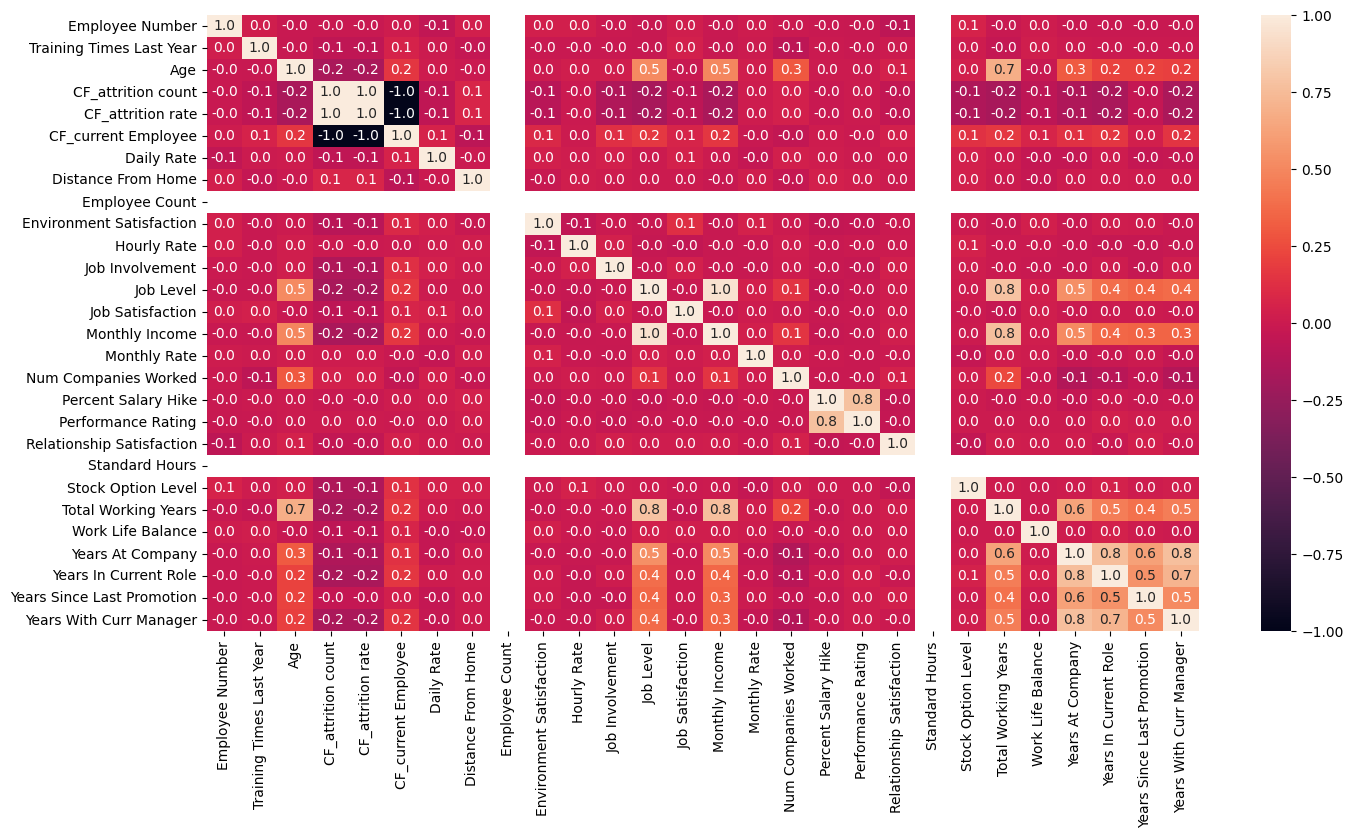

In [12]:
plt.figure(figsize=(16,8))

numeric_hr = hr.select_dtypes(include='number')
sns.heatmap(numeric_hr.corr(), annot=True, fmt='.1f')

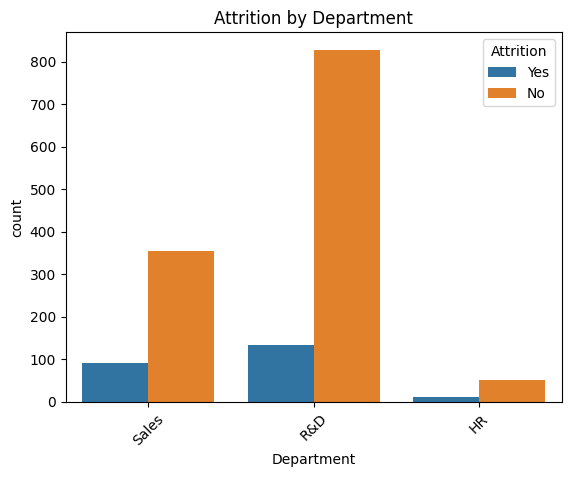

In [25]:

sns.countplot(hr ,x='Department', hue='Attrition')
plt.title('Attrition by Department')
plt.xticks(rotation=45)
plt.show()

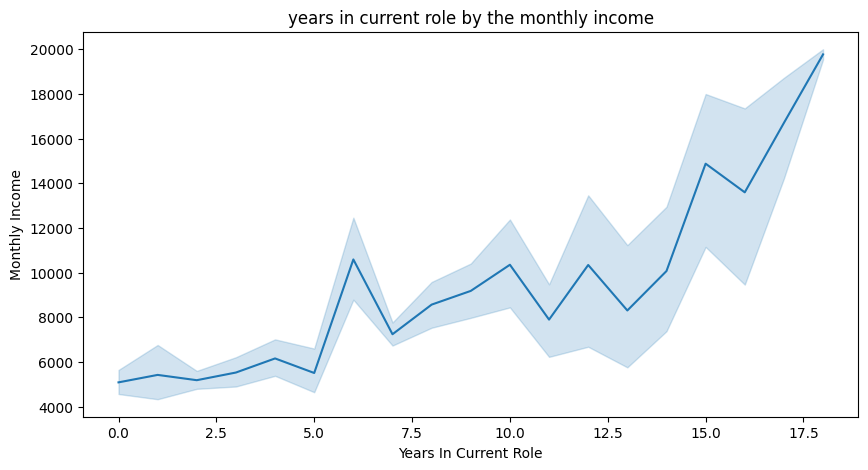

In [26]:
plt.figure(figsize=(10, 5))

sns.lineplot(data=hr, x='Years In Current Role', y='Monthly Income')
plt.title('years in current role by the monthly income')
plt.show()

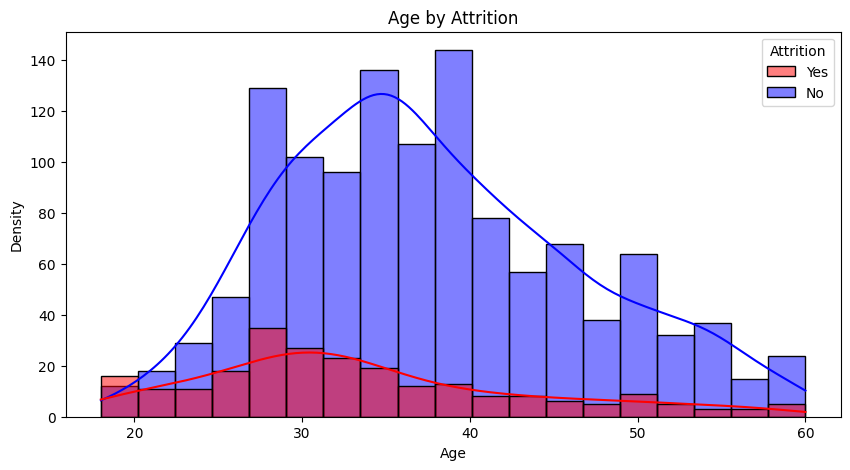

In [14]:
plt.figure(figsize=(10, 5))

sns.histplot(data=hr, x='Age', hue='Attrition', kde=True, palette={'Yes': 'red', 'No': 'blue'})

plt.title('Age by Attrition')
plt.xlabel('Age')
plt.ylabel('Density')

plt.show()

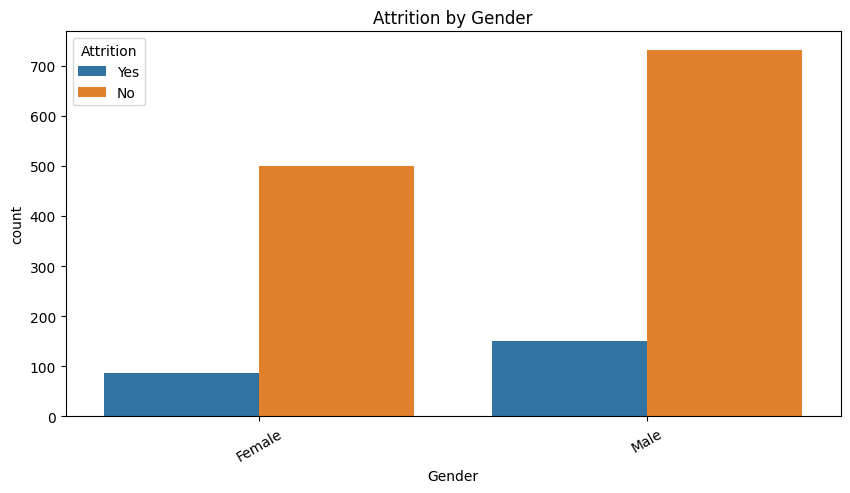

In [29]:
plt.figure(figsize=(10,5))
sns.countplot(hr,x='Gender', hue='Attrition')
plt.title('Attrition by Gender')
plt.xticks(rotation=30)
plt.show()

In [15]:
plt.figure(figsize=(5, 5))

education_counts = hr['Education Field'].value_counts()
fig = px.pie(education_counts, values=education_counts.values, names=education_counts.index, title='Education Fields count')
fig.show()

<Figure size 500x500 with 0 Axes>

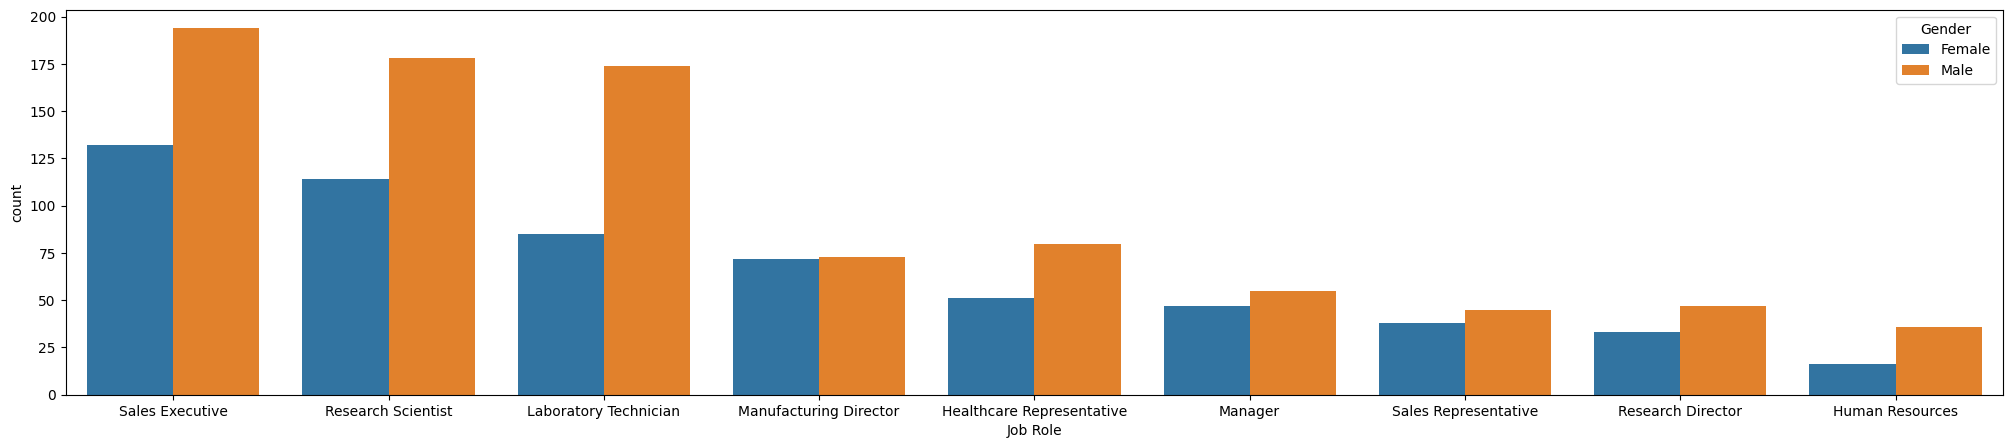

In [16]:
plt.figure(figsize=(25,5))
sns.countplot(data=hr , x= 'Job Role', hue='Gender')
plt.show()

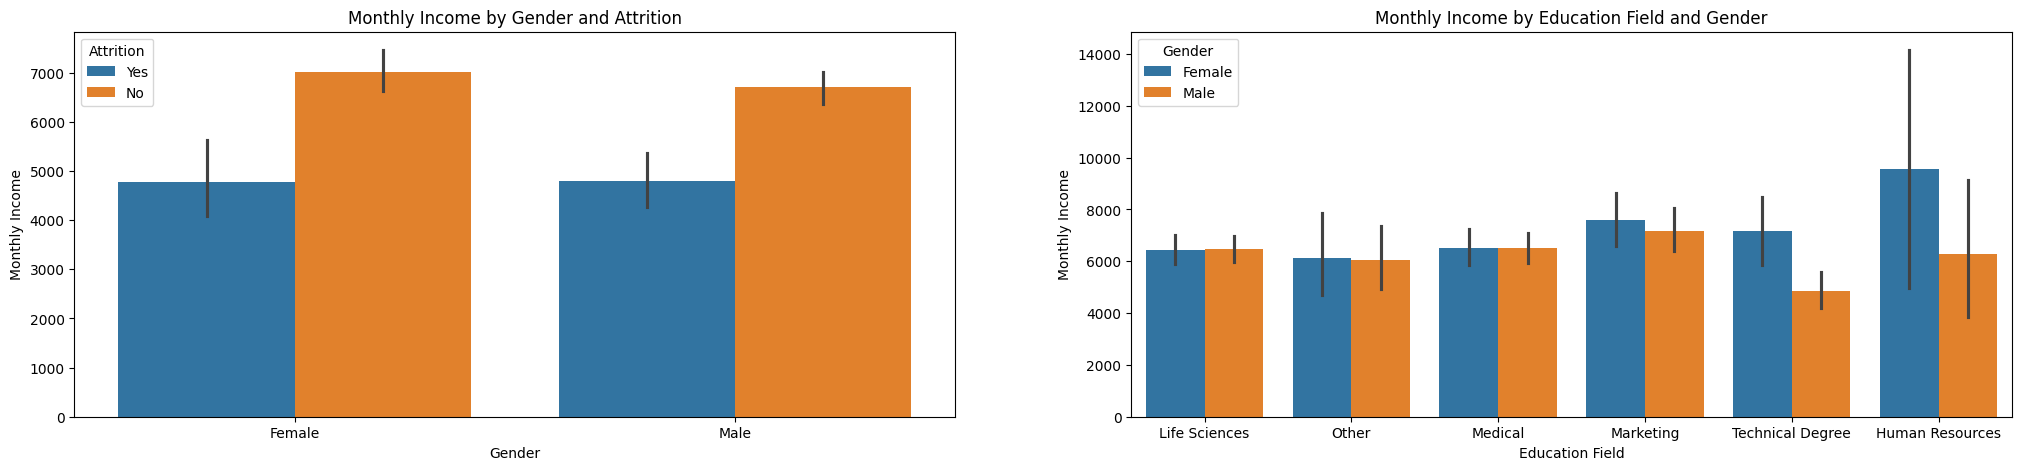

In [17]:
fig, axes = plt.subplots(1, 2, figsize=(25, 5))

sns.barplot(data=hr, x='Gender', y='Monthly Income', hue='Attrition', ax=axes[0])
axes[0].set_title('Monthly Income by Gender and Attrition')

sns.barplot(data=hr, x='Education Field', y='Monthly Income', hue='Gender', ax=axes[1])
axes[1].set_title('Monthly Income by Education Field and Gender')


plt.show()